Printing solution at dx=0.25:
x = -1.00, y = 2.37000, z = -3.48000
x = -0.75, y = 2.43073, z = -1.66999
x = -0.50, y = 2.74329, z = -0.66610
x = -0.25, y = 3.04928, z = 0.00683
x = 0.00, y = 3.29086, z = 0.44604
x = 0.25, y = 3.47852, z = 0.76695
x = 0.50, y = 3.61300, z = 1.05821
x = 0.75, y = 3.67068, z = 1.35657
x = 1.00, y = 3.60967, z = 1.64027
x = 1.25, y = 3.41984, z = 1.84743
x = 1.50, y = 3.16830, z = 1.94115
x = 1.75, y = 2.94337, z = 1.94047
x = 2.00, y = 2.78893, z = 1.88452
x = 2.25, y = 2.70840, z = 1.80316
x = 2.50, y = 2.68877, z = 1.71339
x = 2.75, y = 2.71397, z = 1.62376
x = 3.00, y = 2.76946, z = 1.53820
x = 3.25, y = 2.84353, z = 1.45829
x = 3.50, y = 2.92733, z = 1.38448
x = 3.75, y = 3.01458, z = 1.31663
x = 4.00, y = 3.10111, z = 1.25437


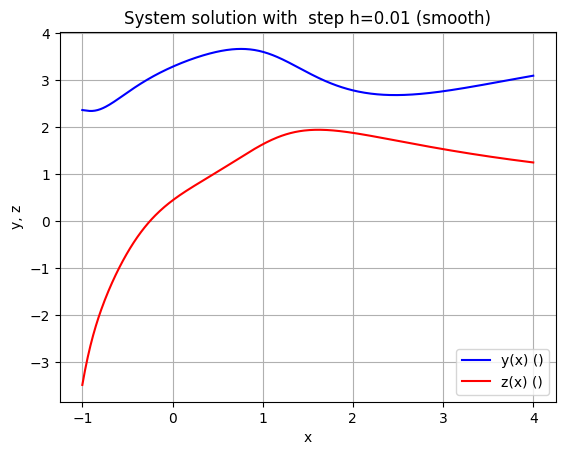

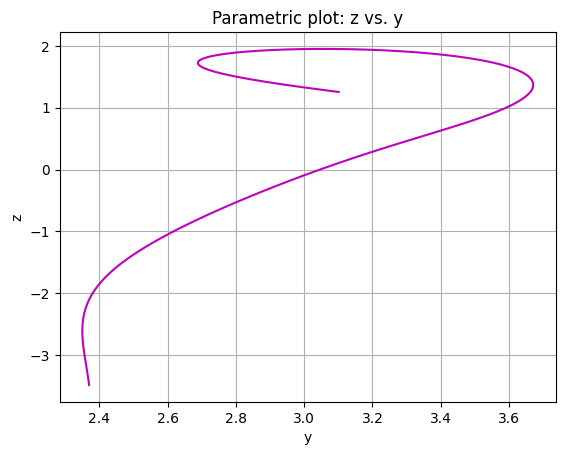

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f_system(x, Y):
    y, z = Y
    # y'
    dy = np.sin(y) + np.cos(z*x)

    # z'
    if np.isclose(x, 0.0):
        # limit as x->0: sin(z*x)/(x) ~ z
        dz = np.exp(-y*0.0) + z
    else:
        dz = np.exp(-y*x) + np.sin(z*x)/x

    return np.array([dy, dz], dtype=float)

def rk4_step(f, x_n, Y_n, h):
    
    k1 = f(x_n,          Y_n)
    k2 = f(x_n + 0.5*h,  Y_n + 0.5*h*k1)
    k3 = f(x_n + 0.5*h,  Y_n + 0.5*h*k2)
    k4 = f(x_n + h,      Y_n + h*k3)

    Y_np1 = Y_n + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    x_np1 = x_n + h
    return x_np1, Y_np1

def solve_system_rk4(f, x_start, Y_start, x_end, h):
    # total steps
    N = int(round((x_end - x_start)/h))
    
    x_vals = np.zeros(N+1)
    Y_vals = np.zeros((N+1, len(Y_start))) 
    
    x_vals[0]   = x_start
    Y_vals[0,:] = Y_start
    
    for n in range(N):
        x_n   = x_vals[n]
        Y_n   = Y_vals[n,:]
        x_np1, Y_np1 = rk4_step(f, x_n, Y_n, h)
        x_vals[n+1]  = x_np1
        Y_vals[n+1,:] = Y_np1
    
    return x_vals, Y_vals

def main():
    x0   = -1.0            
    y0   = 2.37            
    z0   = -3.48           
    x_f = 4.0             
    dx   = 0.25          

    h_solve = 0.01
    Y0 = np.array([y0, z0])
    
    # Solve
    x, Y = solve_system_rk4(f_system, x0, Y0, x_f, h_solve)
    y = Y[:,0]
    z = Y[:,1]
    

    print("Printing solution at dx=0.25:")
    # loop over x and check if x is "close" to a multiple of 0.25
    # round(x / 0.25) * 0.25 gives the nearest multiple of 0.25
    for (xx, yy, zz) in zip(x, y, z):
        if np.isclose(xx, round(xx*4)/4.0, atol=1e-10):
            print(f"x = {xx:.2f}, y = {yy:.5f}, z = {zz:.5f}")

    # Plot y(x) and z(x) vs. x
    plt.figure()
    plt.plot(x, y, 'b-', label='y(x) ()')
    plt.plot(x, z, 'r-', label='z(x) ()')
    plt.title("System solution with  step h=0.01 (smooth)")
    plt.xlabel("x")
    plt.ylabel("y, z")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Parametric plot: y(x) vs z(x)
    plt.figure()
    plt.plot(y, z, 'm-')
    plt.title("Parametric plot: z vs. y")
    plt.xlabel("y")
    plt.ylabel("z")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
